In [2]:
print("hello marketing")

hello marketing


In [1]:
import numpy
import pandas

In [2]:
print("NumPy version:", numpy.__version__)
print("Pandas version:", pandas.__version__)

NumPy version: 1.26.4
Pandas version: 2.3.2


In [3]:
data=pandas.read_table("C:\\matchc.txt",sep="\t",header=0)

In [6]:
data

,Ciel,Temperature,Humidity,Vent,match
0,1,1,1,1,n
1,1,1,1,2,n
2,2,1,1,1,y
3,3,2,1,1,y
4,3,3,2,1,y
5,3,3,2,2,n
6,2,3,2,2,y
7,1,2,1,1,n
8,1,3,2,1,y
9,3,2,2,1,y


In [7]:
from sklearn import tree

In [8]:
clf = tree.DecisionTreeClassifier() #criterion='gini'

In [9]:
features=data.iloc[:,0:4]

In [10]:
features

,Ciel,Temperature,Humidity,Vent
0,1,1,1,1
1,1,1,1,2
2,2,1,1,1
3,3,2,1,1
4,3,3,2,1
5,3,3,2,2
6,2,3,2,2
7,1,2,1,1
8,1,3,2,1
9,3,2,2,1


In [11]:
y=data.iloc[:,4]

In [12]:
y

0     n
1     n
2     y
3     y
4     y
5     n
6     y
7     n
8     y
9     y
10    y
11    y
12    y
13    n
Name: match, dtype: object

In [13]:
features.shape

(14, 4)

In [14]:
y.shape

(14,)

In [15]:
arbre = clf.fit(features, y)

In [17]:
test=pandas.read_table("C:\\testc.txt",sep="\t",header=None)

In [18]:
test

,0,1,2,3,4
0,1,3,2,1,y
1,1,3,1,2,n
2,3,2,2,1,y
3,3,2,2,2,n
4,2,1,2,1,y
5,3,2,1,2,n


In [19]:
features_test=test.iloc[:,0:4]

In [20]:
target_test=test.iloc[:,4]

In [21]:
pred=arbre.predict(features_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [22]:
pred

array(['y', 'n', 'y', 'n', 'y', 'n'], dtype=object)

In [23]:
target_test

0    y
1    n
2    y
3    n
4    y
5    n
Name: 4, dtype: object

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(pred, target_test)

array([[3, 0],
       [0, 3]], dtype=int64)

In [26]:
pandas.DataFrame(confusion_matrix(pred, target_test),columns=['Predicted n', 'Predicted y'],index=['True n', 'True y'])

,Predicted n,Predicted y
True n,3,0
True y,0,3


In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(target_test, pred))

              precision    recall  f1-score   support

           n       1.00      1.00      1.00         3
           y       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [4]:
from pandas import read_excel as read

In [5]:
data=read("C:\\Iris.xls",header=0)

In [6]:
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
import seaborn as sns
sns.set(style='whitegrid')

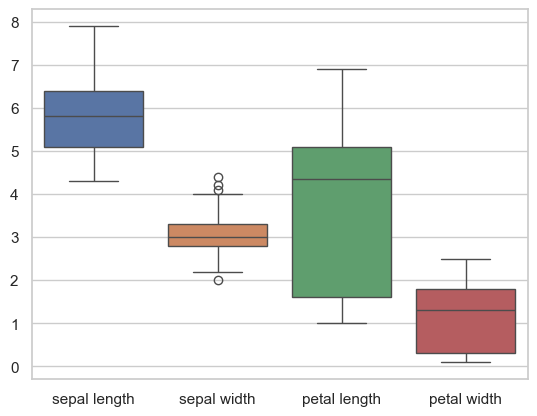

In [9]:
ax = sns.boxplot(data = data)

In [10]:
#origine des outliers
#Naturelles : Variabilité biologique (ex. une fleur Iris-virginica avec un pétale exceptionnellement long).
#Erreurs : Mesures incorrectes, saisie de données erronée.
#Limites du dataset : Petits échantillons pouvant fausser les statistiques.

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [12]:
x=data.iloc[:,0:4]
y=data.iloc[:,4]

In [15]:
from sklearn.model_selection import train_test_split 
y_train, y_test, x_train, x_test = train_test_split(y,x,test_size=0.30,stratify=y)
x_train.shape
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [22]:
cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')

In [23]:
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Mean CV Accuracy: 0.9533


In [40]:
cv_scores = cross_val_score(clf, x, y, cv=5, scoring='f1_weighted')

In [41]:
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV F1: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.96658312 0.96658312 0.89974937 1.         1.        ]
Mean CV F1: 0.9666


In [13]:
metrics = {
    'accuracy': 'accuracy',
    'f1': 'f1_weighted',
    'recall': 'recall_weighted',
    'precision': 'precision_weighted'
}

In [43]:
for name, metric in metrics.items():
    scores = cross_val_score(model, x, y, cv=5, scoring=metric)
    print(f"{name}: {scores.mean():.4f}")

accuracy: 0.9667
f1: 0.9599
recall: 0.9600
precision: 0.9684


In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier (n_estimators=40)
y_train, y_test, x_train, x_test = train_test_split(y,x,test_size=0.40,stratify=y)
x_train.shape
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       0.95      1.00      0.98        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [14]:
for name, metric in metrics.items():
    scores = cross_val_score(model, x, y, cv=5, scoring=metric)
    print(f"{name}: {scores.mean():.4f}")

accuracy: 0.9533
f1: 0.9665
recall: 0.9467
precision: 0.9664


In [46]:
skf = StratifiedKFold(n_splits=5)
cv_scores_stratified = cross_val_score(clf, x, y, cv=skf, scoring='accuracy')

In [201]:
print("\nStratified Cross-Validation Scores:", cv_scores_stratified)
print(f"Mean CV Accuracy: {cv_scores_stratified.mean():.4f}")



Stratified Cross-Validation Scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Mean CV Accuracy: 0.9667


In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of tree
}

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
cv = StratifiedKFold(n_splits=5)

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # Or 'f1_macro', 'recall'..
)

In [18]:
grid_search.fit(x, y)
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy):", grid_search.best_score_)

Best parameters: {'n_estimators': 100}
Best cross-validation score (accuracy): 0.9666666666666668


In [15]:
from sklearn.neural_network import MLPClassifier

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=10000)

In [25]:
from sklearn.model_selection import train_test_split
y_train, y_test, x_train, x_test = train_test_split(y,x,test_size=0.20, stratify=y)

In [26]:
model=clf.fit(x_train, y_train)

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [119]:
for name, metric in metrics.items():
    scores = cross_val_score(model, x, y, cv=5, scoring=metric)
    print(f"{name}: {scores.mean():.4f}")

accuracy: 0.9733
f1: 0.9799
recall: 0.9200
precision: 0.9744


In [120]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Network architecture
    'activation': ['relu', 'tanh', 'logistic'],        # Activation function
    'max_iter': [500, 1000],                            
}
cv = StratifiedKFold(n_splits=5)

# GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',  # Or 'f1_macro', 'recall'..
)

In [121]:
grid_search.fit(x, y)
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (accuracy):", grid_search.best_score_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 1000}
Best cross-validation score (accuracy): 0.9866666666666667
